In [1]:
# !pip show protobuf

In [2]:
# !pip install tensorflow==2.15.0
# !pip install keras==2.15.0
# !pip install numpy==1.23.5

In [3]:
# !pip install tensorflow.compat

In [4]:
!pip install numpy==1.23.4

In [5]:
!pip install yfinance

In [6]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.object = object
np.bool = bool
np.int = int
import math
import IPython
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# import keras
import tensorflow
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

import pickle as pkl
from pandas_datareader import data as pdr
import yfinance as yf  
import datetime
from dateutil.relativedelta import relativedelta

<a href="https://colab.research.google.com/github/SleeplessCoder09/Machine-Learning-with-Python/blob/main/Stock_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# FOR REPRODUCIBILITY
np.random.seed(7)

In [8]:
# # IMPORTING DATASET 
yf.pdr_override()
today = datetime.date.today() - relativedelta(days=-1)
three_yrs_ago = datetime.date.today() - relativedelta(years=3)
print(today)
data = yf.download('TATAMOTORS.NS',0,today)
dataset = data[['Open','High','Low','Close']]
dataset = dataset.reindex(index = dataset.index[::-1])
dataset = dataset[::-1]
data.tail()
print(len(dataset))

2024-01-27
[*********************100%%**********************]  1 of 1 completed
7062


In [9]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(dataset) + 1, 1)

In [10]:
# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]
scale = len(str(int(OHLC_avg.mean())))

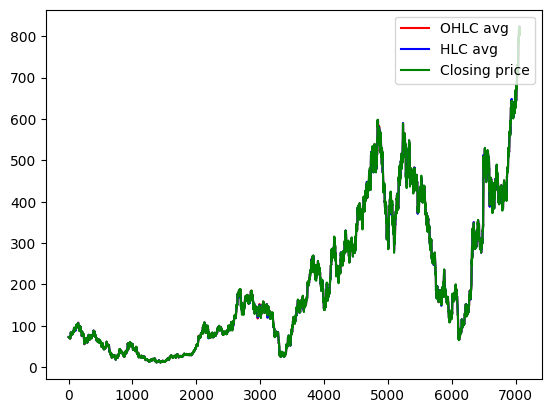

In [11]:
# PLOTTING ALL INDICATORS IN ONE PLOT
fig_handle = plt.figure()
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
# plt.savefig("HDFC_stock_OHLC_avg.png")
# Save figure handle to disk
# pl.dump(fig_handle,file('sinus.pickle','w'))
with open('sinus.pickle', 'wb') as f: # should be 'wb' rather than 'w'
    pkl.dump(fig_handle, f) 
plt.show()

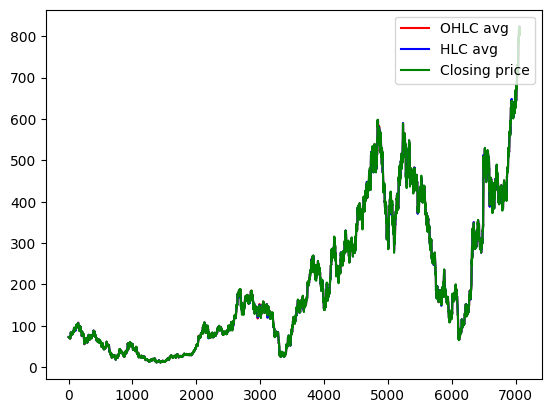

In [12]:
fig_open = pkl.load(open('sinus.pickle','rb'))

In [13]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1))
scaler = MinMaxScaler(feature_range=(0, scale))
OHLC_avg = scaler.fit_transform(OHLC_avg)

In [14]:
# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.95)
# train_OHLC = int(len(OHLC_avg) - 7)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

In [15]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)


trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

In [16]:
# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

In [17]:
trainX[6].shape

(1, 1)

In [18]:
trainY[5]

0.22634126793292844

In [19]:
trainX[6][0][0]

0.22634126793292844

In [20]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [21]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adagrad') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
6706/6706 - 39s - loss: 0.4246
Epoch 2/50
6706/6706 - 32s - loss: 0.1944
Epoch 3/50
6706/6706 - 30s - loss: 0.1257
Epoch 4/50
6706/6706 - 32s - loss: 0.0901
Epoch 5/50
6706/6706 - 30s - loss: 0.0637
Epoch 6/50
6706/6706 - 30s - loss: 0.0435
Epoch 7/50
6706/6706 - 24s - loss: 0.0287
Epoch 8/50
6706/6706 - 25s - loss: 0.0183
Epoch 9/50
6706/6706 - 29s - loss: 0.0114
Epoch 10/50
6706/6706 - 31s - loss: 0.0070
Epoch 11/50
6706/6706 - 25s - loss: 0.0043
Epoch 12/50
6706/6706 - 25s - loss: 0.0027
Epoch 13/50
6706/6706 - 27s - loss: 0.0018
Epoch 14/50
6706/6706 - 29s - loss: 0.0013
Epoch 15/50
6706/6706 - 27s - loss: 0.0010
Epoch 16/50
6706/6706 - 23s - loss: 8.9632e-04
Epoch 17/50
6706/6706 - 22s - loss: 8.1345e-04
Epoch 18/50
6706/6706 - 26s - loss: 7.6715e-04
Epoch 19/50
6706/6706 - 27s - loss: 7.4013e-04
Epoch 20/50
6706/6706 - 24s - loss: 7.2367e-04
Epoch 21/50
6706/6706 - 22s - loss: 7.1229e-04
Epoch 22/50
6706/6706 - 22s - loss: 7.0397e-04
Epoch 23/50
6706/6706 - 29s - loss:

In [22]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [23]:
# trainY = scaler.inverse_transform(trainY)
# trainY

In [24]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# trainY

In [25]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

Train RMSE: 6.64


In [26]:
# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Test RMSE: 33.41


In [27]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

In [28]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

In [29]:
# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

In [30]:
plt.clf

<function matplotlib.pyplot.clf() -> 'None'>

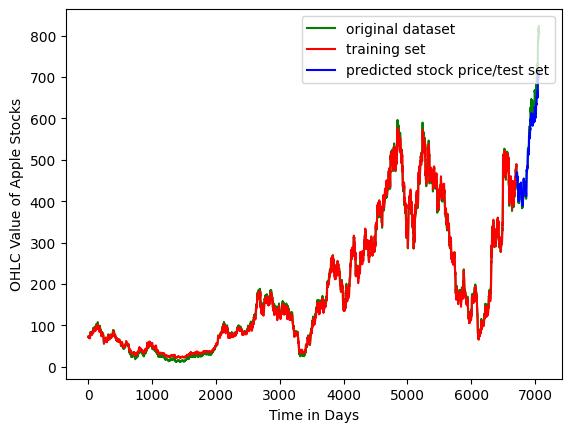

In [31]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
fig_plot = plt.figure()
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
with open('trained.pickle', 'wb') as f: # should be 'wb' rather than 'w'
    pkl.dump(fig_plot, f) 
plt.show()

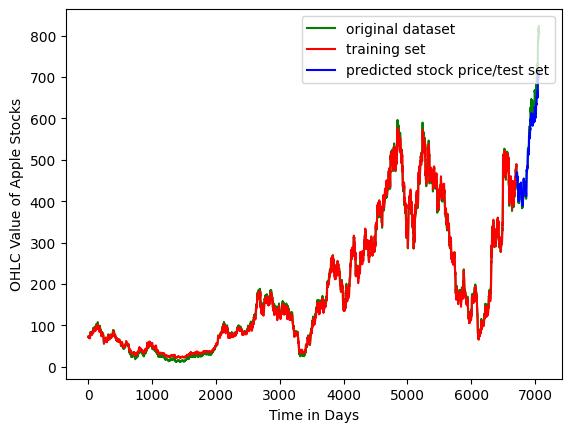

In [32]:
fig_open = pkl.load(open('trained.pickle','rb'))
plt.show()

In [33]:
# fig_open = pkl.load(open('sinus.pickle','rb'))

In [34]:
# plt.clear()

In [35]:
last_val = testPredict[-1-step_size:-1]
print(last_val.shape)
last_val_scaled = last_val/max(last_val)
next_5_val = []

next_val = model.predict(np.reshape(last_val_scaled, (1,1,step_size)))
next_5_val.append(next_val)
print("Last Day Value:", (last_val))
print("Next Day Value:", (last_val*next_val))

(1, 1)
Last Day Value: [[714.8557]]
Next Day Value: [[717.26355]]


In [36]:
last_val

array([[714.8557]], dtype=float32)

In [37]:
(next_val[0][0]*last_val[-last_val[0][0])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1679284654.py, line 1)

In [ ]:
trainY[0]

In [ ]:
print("Last Day Value:", np.ndarray.item(last_val))
print("Next Day Value:", np.ndarray.item(last_val*next_val))

In [ ]:
trainY

In [ ]:
testX

## Basic ARIMA and SARIMAX models

In [ ]:
pip install statsmodels

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=365).mean()
    movingSTD = timeseries.rolling(window=365).std()
    
    #Plot rolling statistics
    fig_plot = plt.figure()
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    with open('mumean.pickle', 'wb') as f: # should be 'wb' rather than 'w'
        pkl.dump(fig_plot, f) 
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    airpass_test = adfuller(timeseries['Prices'], autolag='AIC')
    dfoutput = pd.Series(airpass_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in airpass_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
pd_OHLC_avg = pd.DataFrame(OHLC_avg)
pd_OHLC_avg.columns = ['Prices']
test_stationarity(pd_OHLC_avg)

In [ ]:
pd_OHLC_avg_log = np.log(pd_OHLC_avg)

In [ ]:
plt.plot(pd_OHLC_avg_log)

In [ ]:
rollmean_log = pd_OHLC_avg_log.rolling(window=12).mean()
rollstd_log = pd_OHLC_avg_log.rolling(window=12).std()
plt.plot(pd_OHLC_avg_log, color='blue', label='Original')
plt.plot(rollmean_log, color='red', label='Rolling Mean')
plt.plot(rollstd_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [ ]:
df_new = pd_OHLC_avg_log - rollmean_log
df_new.head()

In [ ]:
df_new.dropna(inplace=True)
df_new.head()

In [ ]:
test_stationarity(df_new)